# Pada praktikum ini kita akan mempelajari algoritma HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) sebagai salah satu metode clustering berbasis densitas yang lebih robust dibandingkan DBSCAN.

## Persiapan Lingkungan

Jalankan kode berikut untuk menyiapkan library yang diperlukan.

In [ ]:
%pip install matplotlib
%pip install hdbscan

  Using cached matplotlib-3.10.6-cp310-cp310-win_amd64.whl (8.1 MB)
  Using cached pillow-11.3.0-cp310-cp310-win_amd64.whl (7.0 MB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ---------------------------------------- 2.3/2.3 MB 1.9 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl (73 kB)
     -------------------------------------- 113.9/113.9 kB 6.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import modul
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import hdbscan

## Langkah 2: Definisi Fungsi Visualisasi
Jalankan fungsi ini agar kita bisa mem-plot hasil clustering dengan warna berbeda.

In [7]:
def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))
    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    proba_map = {idx: probabilities[idx] for idx in range(len(labels))}
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # warna hitam untuk noise
        class_index = (labels == k).nonzero()[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"
    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    ax.set_title(title)
    plt.tight_layout()

## Langkah 3: Membuat Dataset Sintetis
Dataset terdiri dari 3 buah cluster Gaussian.

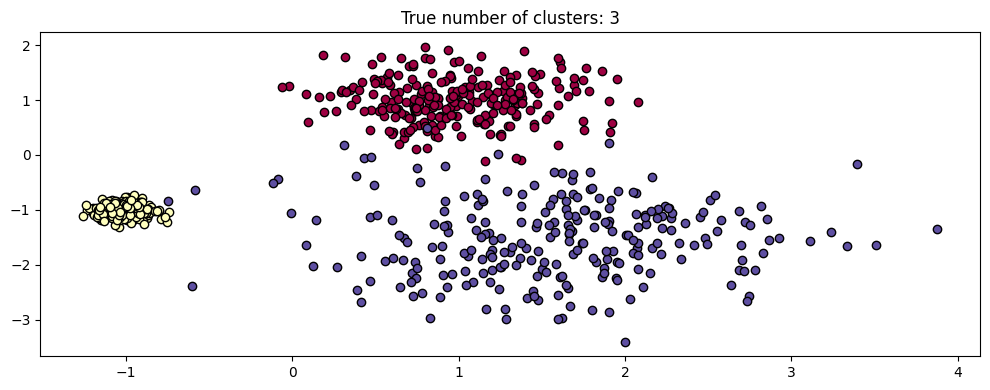

In [8]:
centers = [[1, 1], [-1, -1], [1.5, -1.5]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=[0.4, 0.1, 0.75], random_state=0
)

plot(X, labels=labels_true, ground_truth=True)

## Langkah 4: Uji Scale Invariance pada DBSCAN
Jalankan DBSCAN dengan eps=0.3 pada dataset yang di-scale.

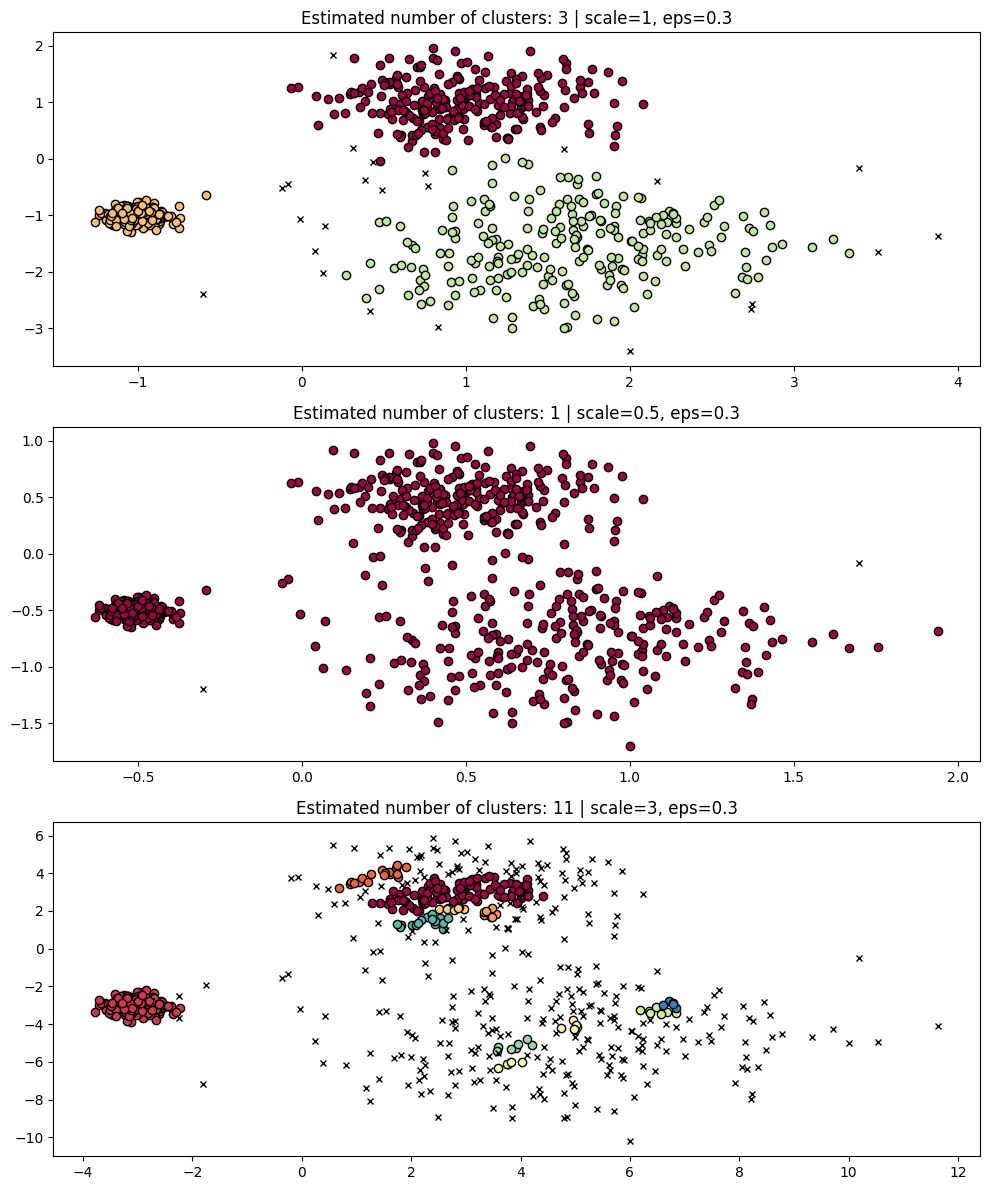

In [9]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
dbs = DBSCAN(eps=0.3)
for idx, scale in enumerate([1, 0.5, 3]):
    dbs.fit(X * scale)
    plot(X * scale, dbs.labels_, parameters={"scale": scale, "eps": 0.3}, ax=axes[idx])

Perbaiki dengan mengubah eps sesuai skala:

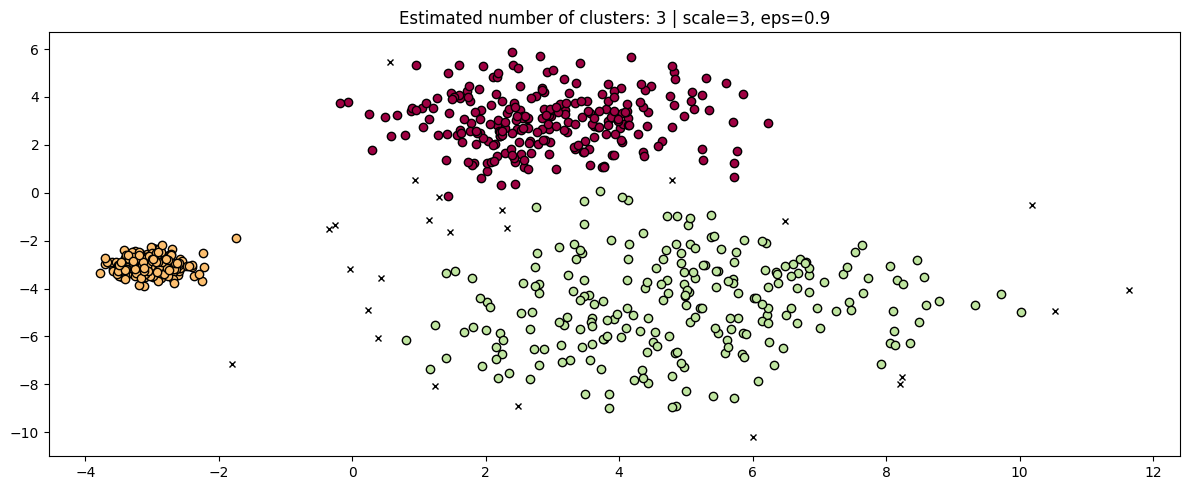

In [10]:
fig, axis = plt.subplots(1, 1, figsize=(12, 5))
dbs = DBSCAN(eps=0.9).fit(3 * X)
plot(3 * X, dbs.labels_, parameters={"scale": 3, "eps": 0.9}, ax=axis)

## Langkah 5: Bandingkan dengan HDBSCAN (lebih robust)
Jalankan HDBSCAN pada dataset berskala berbeda.

f:\semester 5\Pembelajaran Mesin\praktek\Machine-Learning_Ganjil_2025\venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\semester 5\Pembelajaran Mesin\praktek\Machine-Learning_Ganjil_2025\venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\semester 5\Pembelajaran Mesin\praktek\Machine-Learning_Ganjil_2025\venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\semester 5\Pembelajaran Mesin\praktek\Machine-Learning_Ganjil_2025\venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\semes

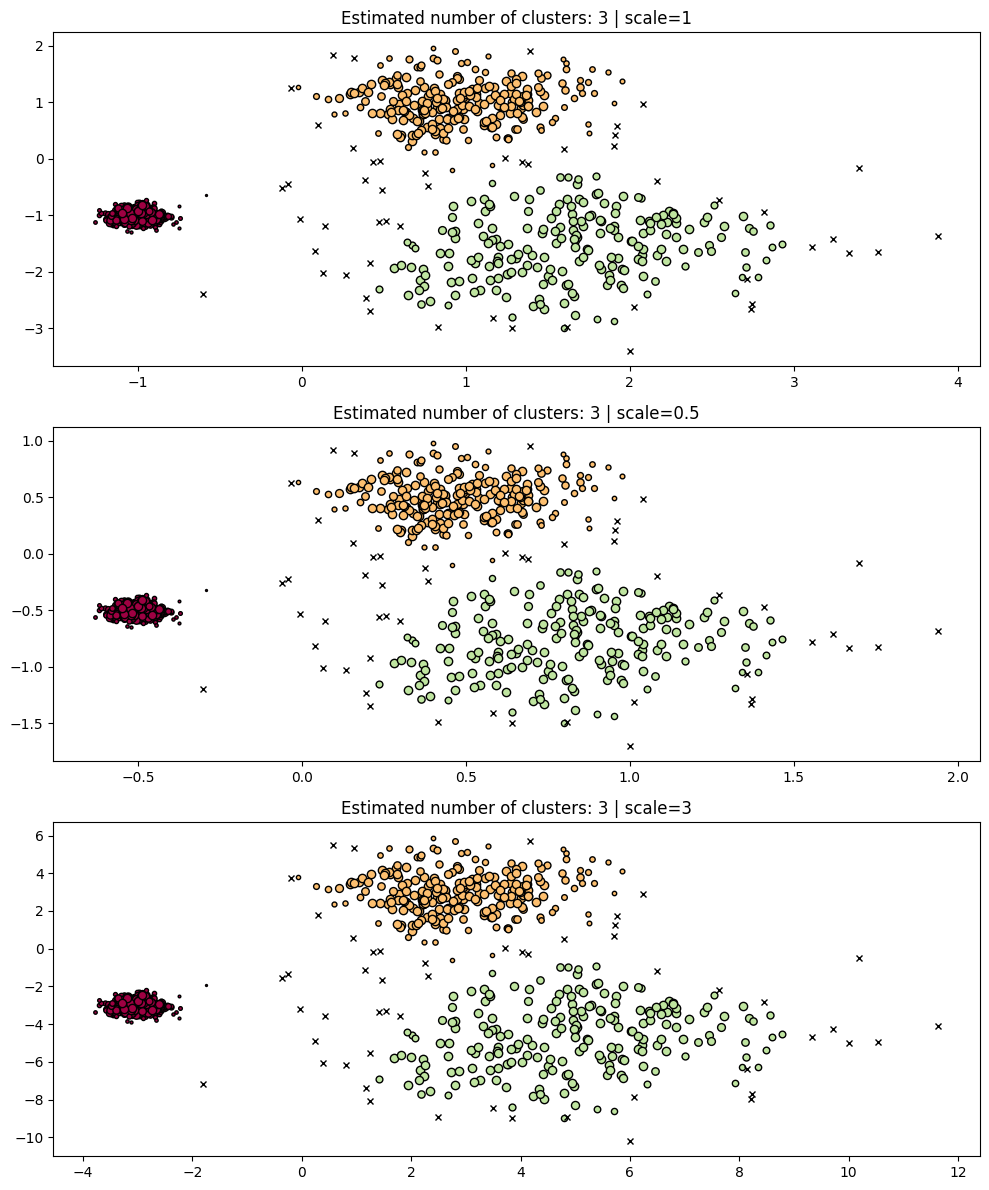

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
hdb = hdbscan.HDBSCAN()
for idx, scale in enumerate([1, 0.5, 3]):
    hdb.fit(X * scale)
    plot(X * scale, hdb.labels_, hdb.probabilities_, ax=axes[idx], parameters={"scale": scale})

## Langkah 6: Multi-Scale Clustering
Buat dataset baru dengan kepadatan berbeda.

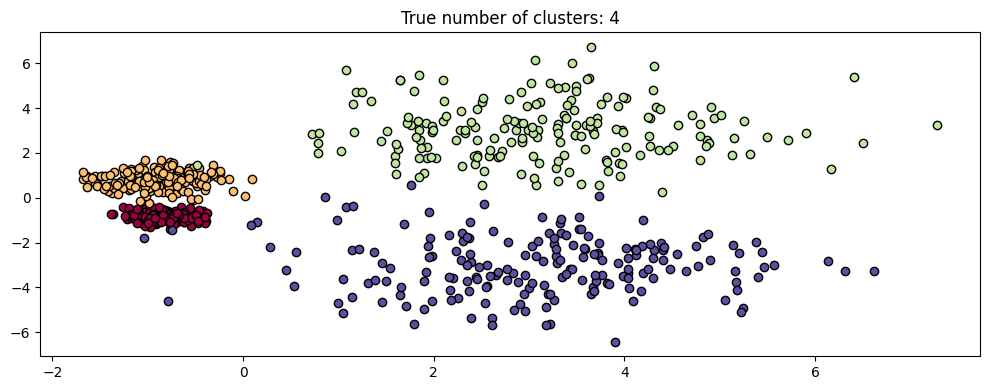

In [12]:
centers = [[-0.85, -0.85], [-0.85, 0.85], [3, 3], [3, -3]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=[0.2, 0.35, 1.35, 1.35], random_state=0
)
plot(X, labels=labels_true, ground_truth=True)

Bandingkan DBSCAN dengan eps berbeda:

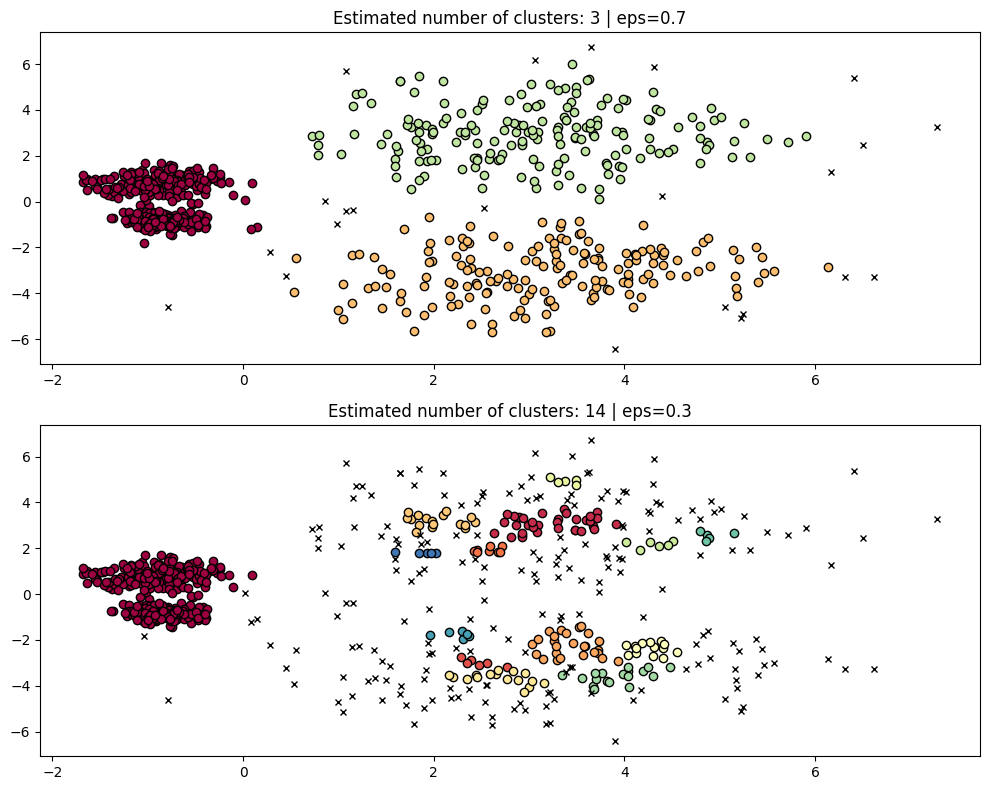

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
params = {"eps": 0.7}
dbs = DBSCAN(**params).fit(X)
plot(X, dbs.labels_, parameters=params, ax=axes[0])

params = {"eps": 0.3}
dbs = DBSCAN(**params).fit(X)
plot(X, dbs.labels_, parameters=params, ax=axes[1])

Jalankan HDBSCAN:

f:\semester 5\Pembelajaran Mesin\praktek\Machine-Learning_Ganjil_2025\venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\semester 5\Pembelajaran Mesin\praktek\Machine-Learning_Ganjil_2025\venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


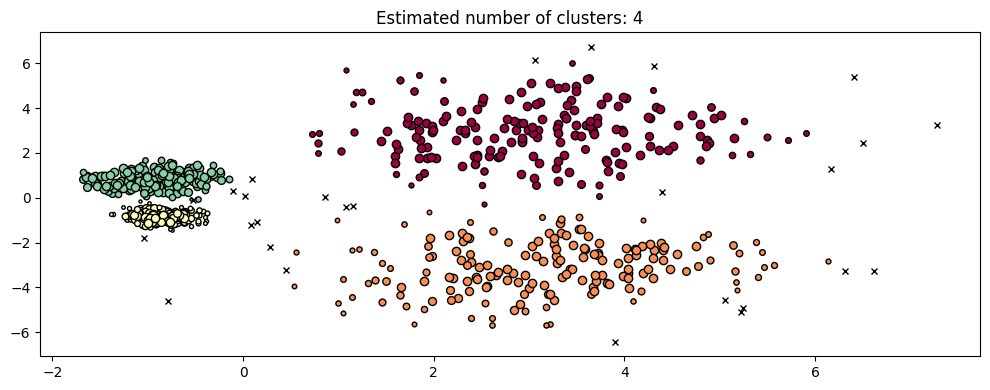

In [14]:
hdb = hdbscan.HDBSCAN().fit(X)
plot(X, hdb.labels_, hdb.probabilities_)

## KLUSTERISASI

Dengan hasil visualisasi yang menunjukkan bagaimana perubahan nilai cut distance pada algoritma HDBSCAN memengaruhi jumlah dan bentuk cluster yang terbentuk.

apabila cut distance dibuat kecil, data akan dipisah sangat detail. Akibatnya, banyak titik yang tidak masuk ke cluster mana pun dan dianggap sebagai noise.
apabila cut distance dibuat besar, pemisahan jadi longgar. Cluster bisa melebur jadi satu kelompok besar, sehingga hampir semua data dianggap satu cluster.
Biasanya, nilai cut distance di tengah‑tengah memberi hasil yang paling pas, karena bisa menangkap pola utama data tanpa terlalu banyak noise atau terlalu menyatu.

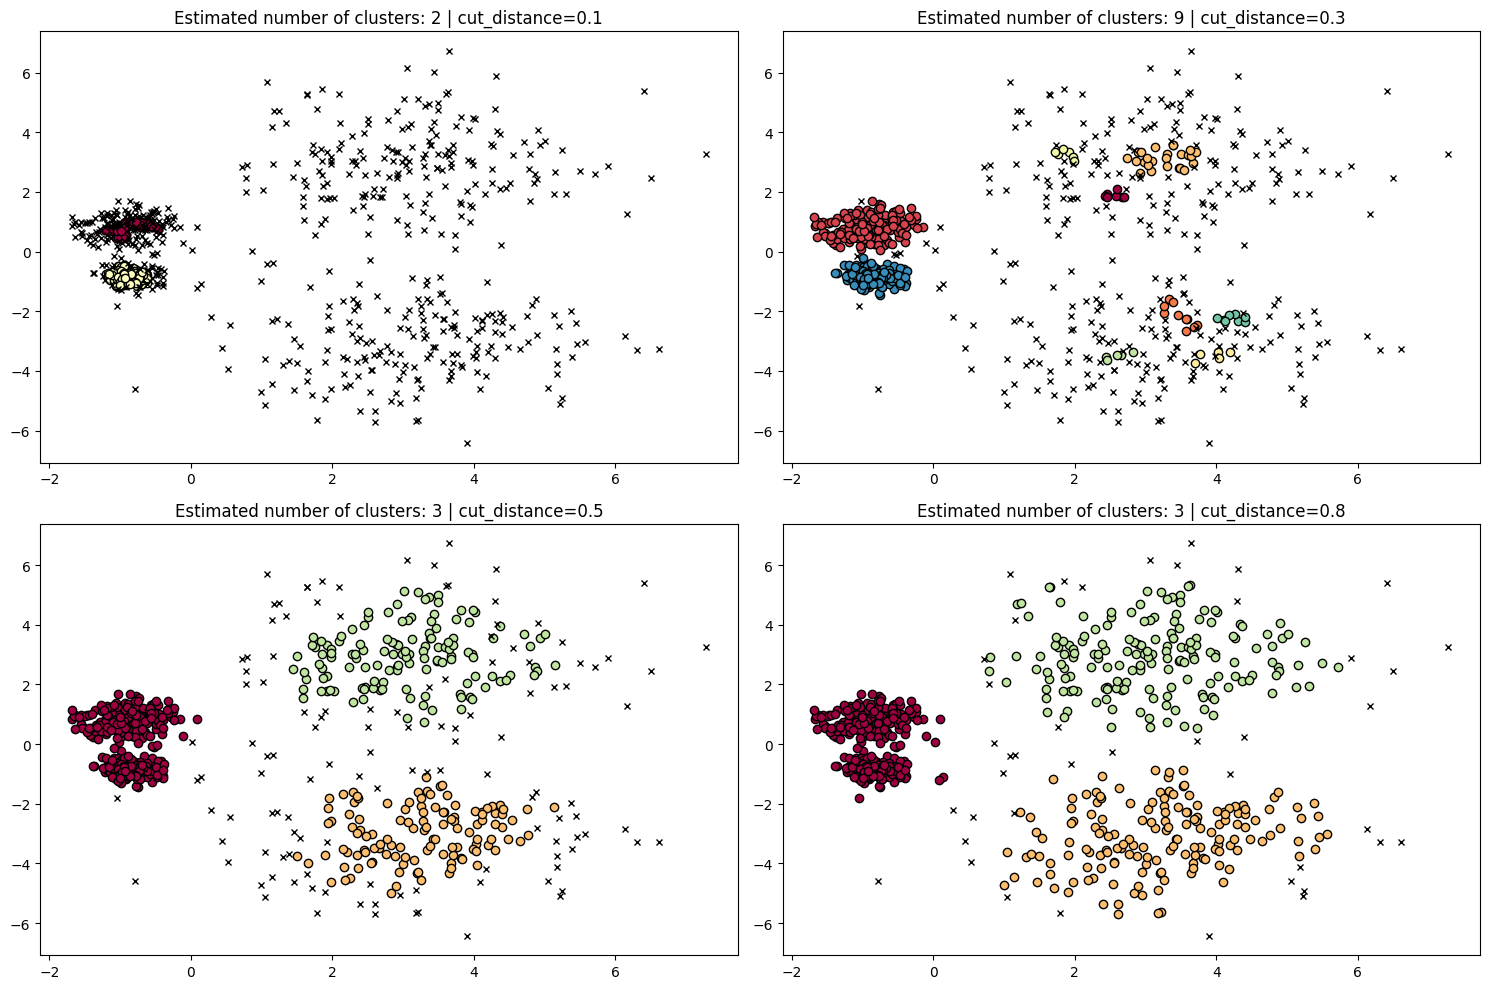

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
cut_distances = [0.1, 0.3, 0.5, 0.8]

for idx, cut_distance in enumerate(cut_distances):
    ax = axes[idx // 2, idx % 2]
    labels_cut = hdb.single_linkage_tree_.get_clusters(cut_distance, min_cluster_size=5)
    plot(X, labels_cut, parameters={"cut_distance": cut_distance}, ax=ax)

plt.tight_layout()
plt.show()

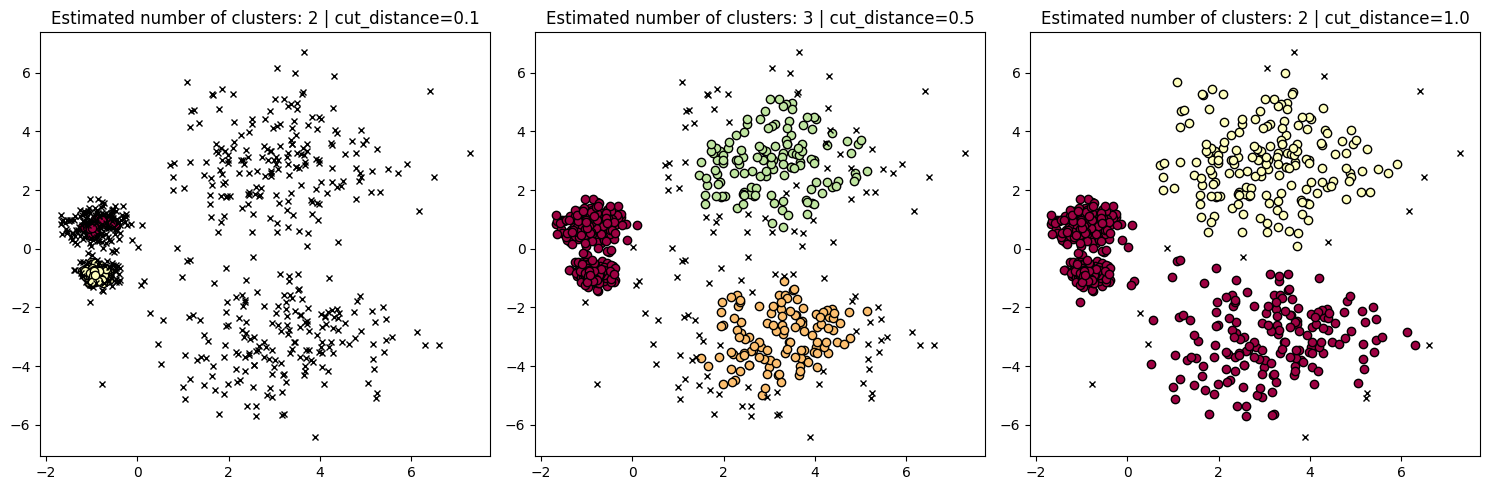

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
cut_distances = [0.1, 0.5, 1.0]

for idx, cut_distance in enumerate(cut_distances):
    labels_cut = hdb.single_linkage_tree_.get_clusters(cut_distance, min_cluster_size=5)
    plot(X, labels_cut, parameters={"cut_distance": cut_distance}, ax=axes[idx])

plt.tight_layout()
plt.show()